## Distribution of publication count for Dmel TF genes

For each TF gene, count the number of *curated* publications, using data from GO and Monarch

In [28]:
import ontobio.golr.golr_associations as ga

In [5]:
# Fetch all Dmel TF genes
DNA_BINDING_TF = 'GO:0003700'
DMEL = 'NCBITaxon:7227'
tf_genes = ga.get_subjects_for_object(object=DNA_BINDING_TF, subject_taxon=DMEL)
len(tf_genes)

478

In [33]:
# Routine to go to GO and Monarch to fetch all annotations for a gene
def get_pubs_for_gene(g):
    
    # Monarch
    r = ga.search_associations(subject=g, rows=-1)
    pubs = set()
    for a in r['associations']:
        pl = a['publications']
        if pl is not None:
            pubs.update([p['id'] for p in pl if p['id'].startswith('PMID')])
    
    # GO
    r = ga.search_associations(subject=g, rows=-1, object_category='function')
    for a in r['associations']:
        pl = a['reference']
        if pl is not None:
            pubs.update([p for p in pl if p.startswith('PMID')])
   
    return pubs
    
len(get_pubs_for_gene(tf_genes[0]))

140

In [15]:
# find all gene,numberOfPub pairs
pairs = []
for g in tf_genes:
    np = len(get_pubs_for_gene(g))
    pairs.append((g,np))
    

In [16]:
# Check
vals = [np for _,np in pairs]
vals[0:5]

[140, 97, 34, 107, 110]

In [20]:
# Check
tf_genes_with_no_pubs = [g for g,np in pairs if np==0]
tf_genes_with_no_pubs

['FB:FBgn0085253']

In [21]:
# genes with fewer than 5 pubs
[g for g,np in pairs if np < 5]

['FB:FBgn0038626',
 'UniProtKB:A0A0B4LH09',
 'FB:FBgn0024975',
 'FB:FBgn0025185',
 'FB:FBgn0028647',
 'FB:FBgn0029173',
 'FB:FBgn0029928',
 'FB:FBgn0030008',
 'FB:FBgn0030012',
 'FB:FBgn0032694',
 'FB:FBgn0033449',
 'FB:FBgn0033627',
 'FB:FBgn0037317',
 'FB:FBgn0039078',
 'FB:FBgn0039329',
 'FB:FBgn0039937',
 'FB:FBgn0052006',
 'FB:FBgn0053213',
 'FB:FBgn0053557',
 'FB:FBgn0085253',
 'FB:FBgn0263511',
 'UniProtKB:A0A0B4K653',
 'UniProtKB:A0A0B4KGA3',
 'UniProtKB:A0A0B4KGM5',
 'UniProtKB:A0A0B4KGW2',
 'UniProtKB:A0A0B4KGW6',
 'UniProtKB:A0A0B4KHC8',
 'UniProtKB:A0A0B4LGG8']

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


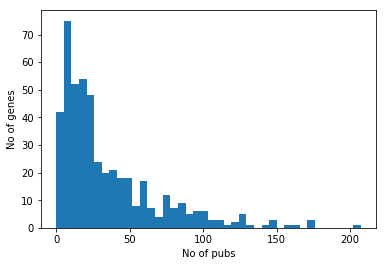

In [24]:
# Histogram
plt.hist(vals, bins=40)
plt.ylabel('No of genes')
plt.xlabel('No of pubs')
plt.show()

In [27]:
# Save results
import csv
with open('gene-pubs.csv', 'w', newline='') as csvfile:
    w = csv.writer(csvfile, delimiter=',')
    for g,np in pairs:
        w.writerow([g,np])
 